In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
currency = pd.read_csv('data/currency_exchange.csv')
remittance = pd.read_csv('data/remittance.csv')
real_interest_rate = pd.read_csv('data/real_interest_rate.csv')
inflation = pd.read_csv('data/inflation.csv')
country_names = pd.read_csv('data/country_name.csv')
remittance_to_gdp = pd.read_csv('data/remittance_gdp_percentage.csv')
currency.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [ ]:
remittance_to_gdp

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.100722,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.087021,1.224280,1.105184,1.075252,1.359812,1.498650,1.504133,1.599903,1.713108,1.655014
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.236114,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,2.206568,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.249838,4.057538,4.107118,4.608343,4.499426,4.245257,3.713186,3.612465,3.737629,4.111046
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022778,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013415,0.014242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.534134,15.429475,14.751550,15.486907,15.684295,15.810534,18.609053,18.006979,17.240737,17.636604
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.750658,7.893840,12.039738,14.047209,17.451430,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.239613,0.238024,0.233457,0.229090,0.229246,0.228613,0.239699,0.220569,0.215376,0.212659
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.214805,0.221383,0.183527,0.361929,0.406536,0.421556,0.743558,1.084834,0.834892,0.872390


In [ ]:
# receive only alpha-3 column from country_names df and rename that column as code
country = pd.DataFrame(country_names['alpha-3'].str.upper())


In [ ]:
country.rename(columns={'alpha-3': 'code'}, inplace=True)

In [ ]:
remittance_to_gdp.dropna(how='all', inplace=True)

In [ ]:
remittance_to_gdp_melted = pd.melt(remittance_to_gdp, id_vars=['Country Name', 'Country Code'],
                            var_name='Year', value_name='Value')

In [ ]:
remittance_to_gdp_without_null = remittance_to_gdp_melted.dropna()

# drop Country Name index and group by country code
remittance_to_gdp_without_null.reset_index(inplace=True)
remittance_to_gdp_without_null.drop(columns=['Country Name'], inplace=True)



<ipython-input-8-24c1f410552b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remittance_to_gdp_without_null.drop(columns=['Country Name'], inplace=True)


In [ ]:
test = remittance_to_gdp_without_null.groupby(['Country Code'])['Value'].mean().rename('Mean')
test = test.sort_values(ascending=False)
test_5 = test[test>5]
selected_countries_code = test_5.index.copy()
len(selected_countries_code)


54

In [ ]:
dataframe = [currency, remittance, real_interest_rate, inflation]

for i in range(len(dataframe)):  # Iterate using index to modify in-place
    df = dataframe[i]  # Extract the DataFrame
    # select only those rows with country code is in contry table
    df = df[df['Country Code'].isin(selected_countries_code)]

    # Drop rows where all values are missing
    df.dropna(how='all', inplace=True)

    # Drop the 'Country Code' column if it exists
    if 'Country Code' in df.columns:
        df.drop(columns=['Country Code'], inplace=True)

    # Melt columns according to 'Country Name' and 'Year'
    dataframe[i] = pd.melt(df, id_vars=['Country Name'], var_name='Year', value_name='Value')
    dataframe[i].set_index(['Country Name', 'Year'], inplace=True)


currency, remittance, real_interest_rate, inflation = dataframe


<ipython-input-10-2cc4ee3702b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all', inplace=True)
<ipython-input-10-2cc4ee3702b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Country Code'], inplace=True)
<ipython-input-10-2cc4ee3702b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all', inplace=True)
<ipython-input-10-2cc4ee3702b6>:13: SettingWithCopyWarning: 
A value is tryin

In [ ]:
currency.rename(columns={'Value': 'exchange_rate'}, inplace=True)
remittance.rename(columns={'Value': 'remittance'}, inplace=True)
real_interest_rate.rename(columns={'Value': 'real_interest_rate'}, inplace=True)
inflation.rename(columns={'Value': 'inflation'}, inplace=True)
remittance_to_gdp.rename(columns={'Value': 'remittance_to_gdp'}, inplace=True)

In [ ]:
# now merge them
merged_data_non_drop = pd.merge(currency, remittance,
                                left_index=True, right_index=True)
merged_data_non_drop = pd.merge(merged_data_non_drop, real_interest_rate,
                                left_index=True, right_index=True)
merged_data_non_drop = pd.merge(merged_data_non_drop, inflation,
                                left_index=True, right_index=True)


In [ ]:
merged_data_drop = merged_data_non_drop.dropna()
merged_data_drop.columns

Index(['exchange_rate', 'remittance', 'real_interest_rate', 'inflation'], dtype='object')

In [ ]:
merged_data_drop.isnull().sum()

,0
exchange_rate,0
remittance,0
real_interest_rate,0
inflation,0


In [ ]:
merged_data_drop.shape

(1030, 4)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(merged_data_drop, x='remittance', y='real_interest_rate', z='exchange_rate', color='inflation',
                    title="Interactive 3D Clustering Visualization")
fig.update_layout(
    width=1000,  # Set width in pixels
    height=600   # Set height in pixels
)


fig.show()

In [ ]:
merged_data_drop.to_csv('merged_data_drop.csv')

In [ ]:
df = pd.read_csv('merged_data_drop.csv')
df.head()

,Country Name,Year,exchange_rate,remittance,real_interest_rate,inflation
0,Eswatini,1975,0.739508,7.978280e+06,6.271984,4.213732
1,Jamaica,1976,0.909090,8.850000e+07,2.361807,11.131130
2,Eswatini,1976,0.869565,9.775000e+06,-2.703417,13.570278
3,"Egypt, Arab Rep.",1977,0.391304,9.276651e+08,-3.119680,12.337917
4,Jamaica,1977,0.909090,8.170000e+07,1.216594,12.486497


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [ ]:
df = df.set_index(["country_name", "year"])

In [ ]:
Q1 = df['inflation'].quantile(0.25)
Q3 = df['inflation'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = df[(df['inflation'] < (Q1 - 1.5 * IQR)) | (df['inflation'] > (Q3 + 1.5 * IQR))]



# View outliers
print(outliers)

                       exchange_rate    remittance  real_interest_rate  \
country_name     year                                                    
Jamaica          1978       1.413258  6.910000e+07          -10.184418   
Egypt, Arab Rep. 1979       0.700001  2.213572e+09           -9.311642   
Lesotho          1980       0.778834  2.632141e+08          -21.532312   
Somalia          1980       6.295000  5.725179e+07          -43.301694   
Egypt, Arab Rep. 1982       0.700001  2.439143e+09           -7.801485   
...                              ...           ...                 ...   
Haiti            2022     115.630715  3.797753e+09          -14.674426   
Ukraine          2022      32.342302  1.678300e+10          -12.086013   
Egypt, Arab Rep. 2023      30.626414  1.953210e+10           -5.642822   
Guyana           2023     208.500000  5.250318e+08           26.398262   
Timor-Leste      2023       1.000000  1.929876e+08           35.477503   

                       inflation  
co

In [ ]:
# Convert the index of outliers to a list
outlier_indices = outliers.index.tolist() # Get a list of outlier indices

# Filter out rows with outlier indices
df = df[~df.index.isin(outlier_indices)]

In [ ]:
outlier_indices

[('Jamaica', 1978),
 ('Egypt, Arab Rep.', 1979),
 ('Lesotho', 1980),
 ('Somalia', 1980),
 ('Egypt, Arab Rep.', 1982),
 ('Somalia', 1982),
 ('Somalia', 1983),
 ('Jamaica', 1984),
 ('Philippines', 1984),
 ('Jamaica', 1985),
 ('Jamaica', 1986),
 ('Eswatini', 1988),
 ('Jamaica', 1990),
 ('Eswatini', 1990),
 ('Dominican Republic', 1991),
 ('Jamaica', 1991),
 ('Albania', 1992),
 ('Jamaica', 1992),
 ('Nicaragua', 1992),
 ('Albania', 1993),
 ('Jamaica', 1993),
 ('Albania', 1994),
 ('Jamaica', 1994),
 ('Nicaragua', 1994),
 ('Armenia', 1995),
 ('Jamaica', 1995),
 ('Moldova', 1995),
 ('Albania', 1996),
 ('Kyrgyz Republic', 1996),
 ('Moldova', 1996),
 ('Ukraine', 1996),
 ('Yemen, Rep.', 1996),
 ('Kyrgyz Republic', 1999),
 ('Moldova', 1999),
 ('Ukraine', 1999),
 ('Yemen, Rep.', 1999),
 ('Haiti', 2000),
 ('Kyrgyz Republic', 2000),
 ('Moldova', 2000),
 ('Eswatini', 2000),
 ('Ukraine', 2000),
 ('Yemen, Rep.', 2000),
 ('Dominican Republic', 2003),
 ('Tajikistan', 2003),
 ('Dominican Republic', 2004),
 

In [ ]:
import plotly.express as px

fig = px.scatter_3d(outliers, x='exchange_rate', y='remittance', z='real_interest_rate', color='inflation',
                    title="Interactive 3D Clustering Visualization")
fig.update_layout(
    width=800,  # Set width in pixels
    height=600   # Set height in pixels
)


fig.show()

In [ ]:
df

,,exchange_rate,remittance,real_interest_rate,inflation
country_name,year,,,,
Eswatini,1975,0.739508,7.978280e+06,6.271984,4.213732
Jamaica,1976,0.909090,8.850000e+07,2.361807,11.131130
Eswatini,1976,0.869565,9.775000e+06,-2.703417,13.570278
"Egypt, Arab Rep.",1977,0.391304,9.276651e+08,-3.119680,12.337917
Jamaica,1977,0.909090,8.170000e+07,1.216594,12.486497
...,...,...,...,...,...
Ukraine,2023,36.573808,1.496700e+10,3.041090,18.507837
Uzbekistan,2023,11734.833420,1.392501e+10,8.836084,12.233077
St. Vincent and the Grenadines,2023,2.700000,9.177830e+07,3.008158,4.033144


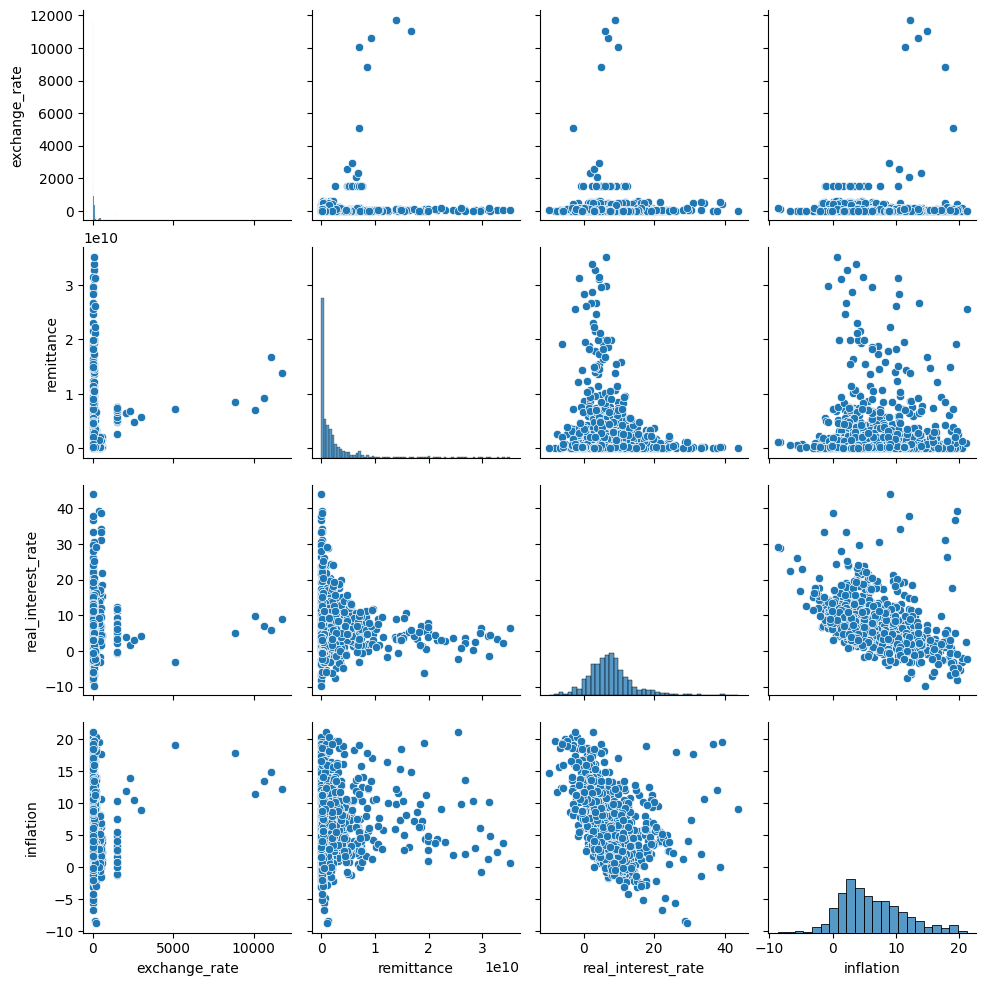

In [ ]:
# scatter plot between each columns
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
X = df.drop(columns=['inflation'])
y = df['inflation']

# Split data
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,
                                                                                test_size=0.2, random_state=42)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.2629 - mae: 0.4821 - val_loss: 0.2097 - val_mae: 0.4247
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2245 - mae: 0.4384 - val_loss: 0.1740 - val_mae: 0.3796
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1843 - mae: 0.3893 - val_loss: 0.1416 - val_mae: 0.3328
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1533 - mae: 0.3452 - val_loss: 0.1126 - val_mae: 0.2851
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1240 - mae: 0.3006 - val_loss: 0.0873 - val_mae: 0.2390
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0964 - mae: 0.2528 - val_loss: 0.0666 - val_mae: 0.1967
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0792 - mae: 0.2200 - val_loss: 0.0521 - val_mae: 0.1702
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0631 - mae: 0.1917 - val_loss: 0.0444 - val_mae: 0.1624
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0564 - mae: 0.1821 - va

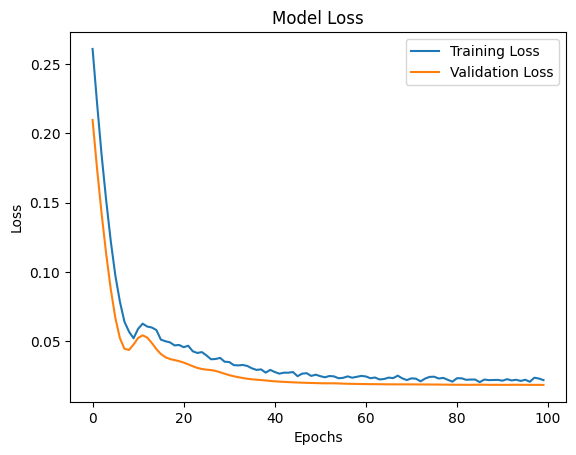

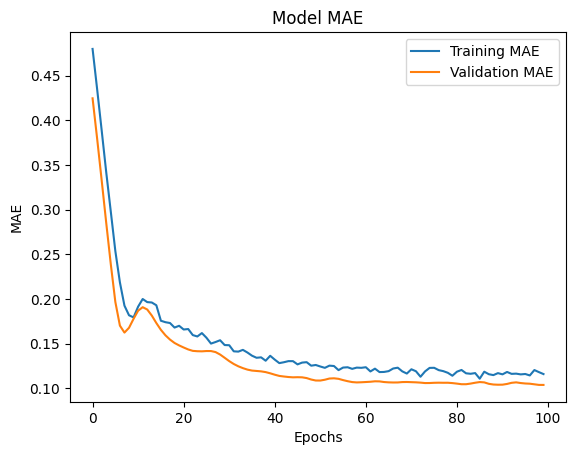

In [ ]:


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),# Input layer with 64 neurons
    Dense(64, activation='relu'),
    Dropout(0.3),# Hidden layer with 32 neurons
    Dense(1)                                                      # Output layer for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled),
                    epochs=100, batch_size=512, verbose=1)

# Evaluate the Model
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)

print()
print(f"Test Loss: {loss:.8f}, Test MAE: {mae:.8f}")

# Visualize Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# plot accuracy training vs validation

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Model MAE')
plt.legend()
plt.show()






In [ ]:
predictions_nn = model.predict(X_test_scaled)
prediction_nn_reversed = scaler.inverse_transform(predictions_nn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
difr = y_test - prediction_nn_reversed.flatten()
difr.rename('difference', inplace=True)

,,difference
country_name,year,
Lesotho,2019,-0.555677
Montenegro,2009,-2.075172
Serbia,2005,-4.625133
Guatemala,2021,-1.817479
Cabo Verde,2020,-3.491166
...,...,...
Georgia,2009,-5.534116
Armenia,2015,-1.936289
Guyana,1983,3.507347


In [ ]:
df_prediction = pd.DataFrame(prediction_nn_reversed.flatten(), columns=['prediction'], index=y_test.index)
# df_prediction.set_index(y_test.index) # No need for this anymore

df_y_test = y_test.copy()

nn_pred_diff = pd.concat([df_y_test, df_prediction, difr], axis=1)
# merged_df.set_index(y_test.index) # No need for this anymore
nn_pred_diff

,,inflation,prediction,difference
country_name,year,,,
Lesotho,2019,3.575454,4.131132,-0.555677
Montenegro,2009,2.407912,4.483084,-2.075172
Serbia,2005,14.667996,19.293129,-4.625133
Guatemala,2021,2.693502,4.510982,-1.817479
Cabo Verde,2020,0.366160,3.857326,-3.491166
...,...,...,...,...
Georgia,2009,-2.135768,3.398348,-5.534116
Armenia,2015,1.213910,3.150198,-1.936289
Guyana,1983,8.919685,5.412337,3.507347


In [ ]:
mse_nn = mean_squared_error(y_test, prediction_nn_reversed)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, prediction_nn_reversed)
r2_nn = r2_score(y_test, prediction_nn_reversed)

print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn}")
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"R-squared (R2): {r2_nn}")

Mean Squared Error (MSE): 16.320947621112126
Root Mean Squared Error (RMSE): 4.039919259231813
Mean Absolute Error (MAE): 3.1024625459172754
R-squared (R2): 0.3354550231874296


In [ ]:
mse_nn_scaled = mean_squared_error(y_test_scaled, predictions_nn)
rmse_nn_scaled = np.sqrt(mse_nn_scaled)
mae_nn_scaled = mean_absolute_error(y_test_scaled, predictions_nn)
r2_nn_scaled = r2_score(y_test_scaled, predictions_nn)

print(f"Mean Squared Error (MSE): {mse_nn_scaled}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn_scaled}")
print(f"Mean Absolute Error (MAE): {mae_nn_scaled}")
print(f"R-squared (R2): {r2_nn_scaled}")

Mean Squared Error (MSE): 0.018280225320905428
Root Mean Squared Error (RMSE): 0.13520438351216807
Mean Absolute Error (MAE): 0.10383042514076761
R-squared (R2): 0.33545502250380077


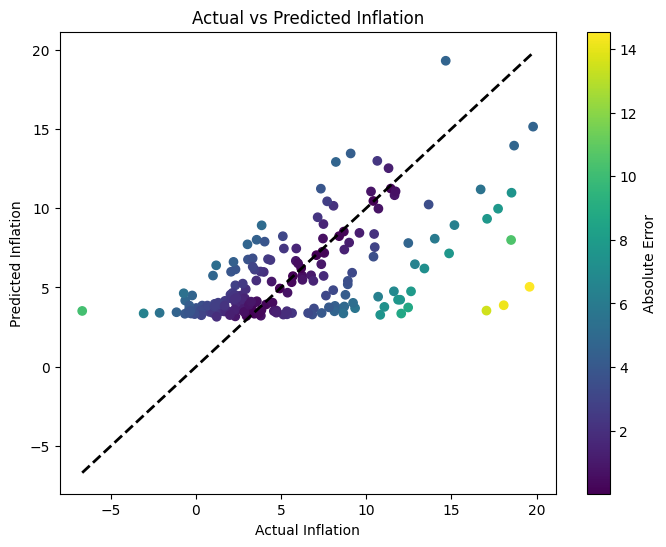

In [ ]:


# Calculate errors
errors = np.abs(nn_pred_diff['difference'])

plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
plt.scatter(y_test, prediction_nn_reversed, c=errors, cmap='viridis')  # Color by error
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2) # Add diagonal line
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.title('Actual vs Predicted Inflation')
plt.colorbar(label='Absolute Error') #Add colorbar
plt.show()

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

y_pred_lr = model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test_scaled, y_pred_lr)
rmse_lr = mse_lr ** 0.5

print("Linear Regression Model Metric Evaluation")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean absolute Error (MAE): {mean_absolute_error(y_test_scaled, y_pred_lr)}")
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_lr)}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Linear Regression Model Metric Evaluation
Root Mean Squared Error (RMSE): 0.13520438351216807
Mean Squared Error (MSE): 0.018280225320905428
Mean absolute Error (MAE): 0.10383042514076761
R2 Score: 0.33545502250380077


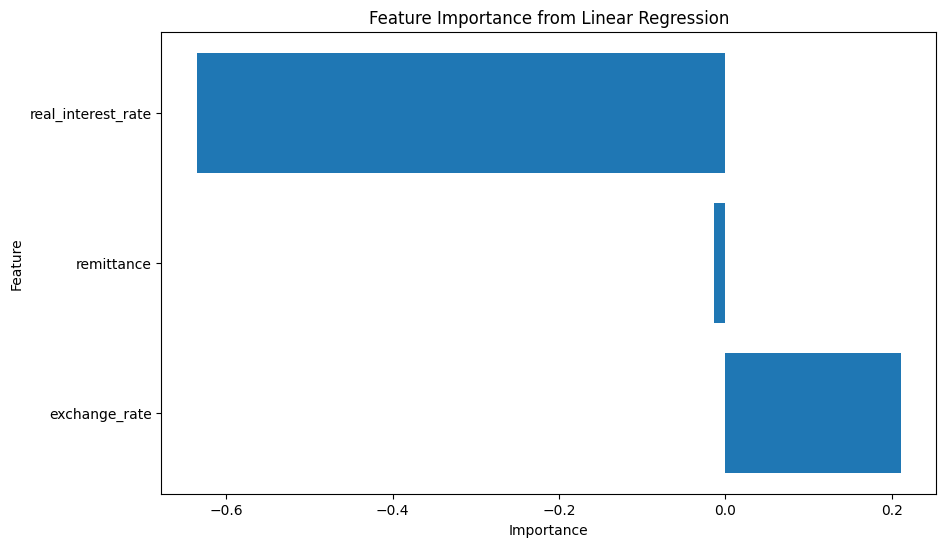

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Make sure to import pandas

# Assuming 'model_lr' is your trained linear regression model and 'X' contains your feature names
feature_importance = model_lr.coef_[0]  # Extract coefficients for the first (and likely only) target variable
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.show()

In [ ]:
# prompt: apply polynomial regression of degree 2

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
y_test_poly = poly.fit_transform(y_test_scaled)
y_train_poly = poly.fit_transform(y_train_scaled)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_scaled)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test_scaled, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test_scaled, y_pred_poly)
r2_poly = r2_score(y_test_scaled, y_pred_poly)

print(f"Polynomial Regression - Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"Polynomial Regression - Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression - Mean absolute Error (MAE): {mae_poly}")
print(f"Polynomial Regression - R2 Score: {r2_poly}")

Polynomial Regression - Root Mean Squared Error (RMSE): 0.13418211744079864
Polynomial Regression - Mean Squared Error (MSE): 0.018004840640896278
Polynomial Regression - Mean absolute Error (MAE): 0.1096236156113981
Polynomial Regression - R2 Score: 0.3454661412272769


In [ ]:
from sklearn.linear_model import ElasticNetCV

# Assuming X_train_scaled, y_train_scaled are already defined
# as in your provided code.

model_lr_en = ElasticNetCV(cv=5, random_state=42) # Use ElasticNetCV
model_lr_en.fit(X_train_scaled, y_train_scaled.ravel()) # .ravel() to handle potential shape mismatch

y_pred_lr_en = model_lr_en.predict(X_test_scaled)

mse_lr_en = mean_squared_error(y_test_scaled, y_pred_lr_en)
rmse_lr_en = mse_lr ** 0.5
mae_lr_en = mean_absolute_error(y_test_scaled, y_pred_lr_en)
r2_score_lr_en = r2_score(y_test_scaled, y_pred_lr_en)

print(f"Root Mean Squared Error (RMSE): {rmse_lr_en}")
print(f"Mean Squared Error (MSE): {mse_lr_en}")
print(f"Mean Absolute Error (MAE): {mae_lr_en}")
print(f"R2 Score: {r2_score_lr_en}")

Root Mean Squared Error (RMSE): 0.13520438351216807
Mean Squared Error (MSE): 0.025727156474266256
Mean Absolute Error (MAE): 0.12584126461507358
R2 Score: 0.06473512661354597


# Perform clustering

In [ ]:
from sklearn.cluster import KMeans

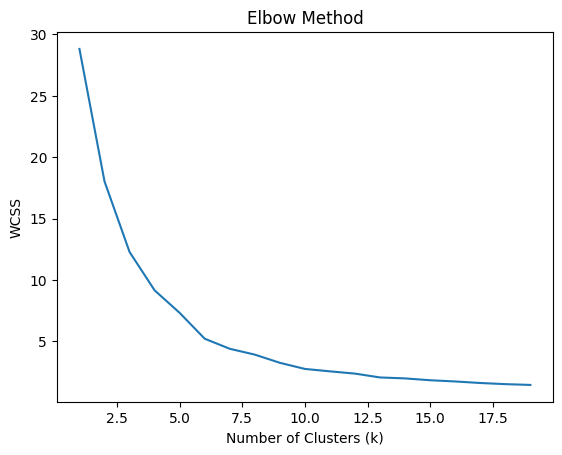

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans with different k values
wcss = []  # Within-cluster sum of squares
for i in range(1, 20):  # Try k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# # Create a new DataFrame with the cluster labels
kmeans_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
kmeans_df['clusters'] = cluster_labels #add a new 'clusters' column


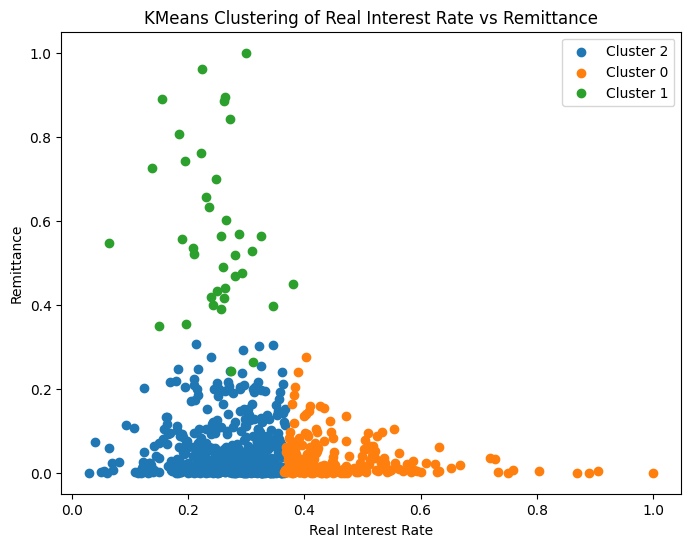

In [ ]:
# prompt: plot a 2d graph from kmeans with features real interest rate and remittance and clusters

import matplotlib.pyplot as plt

# Assuming kmeans_df is your DataFrame with 'real_interest_rate', 'remittance', and 'clusters' columns
plt.figure(figsize=(8, 6))
for cluster_label in kmeans_df['clusters'].unique():
    cluster_data = kmeans_df[kmeans_df['clusters'] == cluster_label]
    plt.scatter(cluster_data['real_interest_rate'], cluster_data['remittance'], label=f'Cluster {cluster_label}')

plt.xlabel('Real Interest Rate')
plt.ylabel('Remittance')
plt.title('KMeans Clustering of Real Interest Rate vs Remittance')
plt.legend()
plt.show()

In [ ]:
# Evaluate KMeans clustering using silhouette score
from sklearn.metrics import silhouette_score

# Assuming kmeans is your fitted KMeans model and X_train_scaled is your scaled data
silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4189957947892292


In [ ]:
# Analyze the characteristics of each cluster
for cluster_label in kmeans_df['clusters'].unique():
    cluster_data = kmeans_df[kmeans_df['clusters'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data.describe()) # Print descriptive statistics for the cluster
    print("-" * 20) # Separator between clusters

#Further analysis
print(kmeans_df.groupby('clusters').agg(['mean','median'])) #Compare clusters based on mean/median of features

Cluster 2:
       exchange_rate  remittance  real_interest_rate  clusters
count     520.000000  520.000000          520.000000     520.0
mean        0.008705    0.049349            0.269935       2.0
std         0.030358    0.063694            0.067661       0.0
min         0.000000    0.000000            0.030617       2.0
25%         0.000197    0.002690            0.229177       2.0
50%         0.000616    0.024933            0.283600       2.0
75%         0.005737    0.065365            0.321674       2.0
max         0.435767    0.305475            0.366433       2.0
--------------------
Cluster 0:
       exchange_rate  remittance  real_interest_rate  clusters
count     208.000000  208.000000          208.000000     208.0
mean        0.009188    0.035983            0.466189       0.0
std         0.020388    0.046142            0.106570       0.0
min         0.000026    0.000029            0.364894       0.0
25%         0.000358    0.003485            0.392293       0.0
50%         

In [ ]:
test.columns

Index(['exchange_rate', 'remittance', 'real_interest_rate'], dtype='object')

In [ ]:
fig = px.scatter_3d(kmeans_df, x='exchange_rate', y='remittance', z='real_interest_rate', color='clusters',
                    title="Interactive 3D Clustering Visualization")
fig.update_layout(
    width=1000,  # Set width in pixels
    height=600   # Set height in pixels
)


fig.show()

In [ ]:

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame from cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_train.columns)

# Display or analyze the cluster centers
print(cluster_centers_df)

# For example, you could look at the absolute differences between cluster centers for each feature:
feature_differences = np.abs(cluster_centers_df.max() - cluster_centers_df.min())
print("\nFeature Differences:")
print(feature_differences)


# The larger the difference, the more important the feature might be in separating clusters.

plt.figure(figsize=(10, 6))
feature_differences.plot(kind='bar')
plt.title('Difference between max and min cluster center values')
plt.xlabel('Feature')
plt.ylabel('Absolute Difference')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create interaction terms
data = df.copy()
data['Remittance_x_ExchangeRate'] = data['remittance'] * data['exchange_rate']
data['Remittance_x_InterestRate'] = data['remittance'] * data['real_interest_rate']
data['Intereset_rate_x_ExchangeRate'] = data['real_interest_rate'] * data['exchange_rate']
data['Remittance_X_InterestRate_x_ExchangeRate'] = data['Remittance_x_InterestRate'] * data['exchange_rate']

# Prepare features and target
X = data[['remittance', 'exchange_rate', 'real_interest_rate',
          'Remittance_x_ExchangeRate', 'Remittance_x_InterestRate','Intereset_rate_x_ExchangeRate', 'Remittance_X_InterestRate_x_ExchangeRate']]
y = data['inflation']




In [ ]:
# Split the dataset
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled,
                                                                                test_size=0.2, random_state=42)

In [ ]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("\nLinear Regression Evaluation:")
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, y_pred_lr)):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_scaled, y_pred_lr):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_scaled, y_pred_lr):.4f}")



Linear Regression Evaluation:
R2 Score: 0.0995
RMSE: 0.1574
Mean Squared Error: 0.0248
Mean Absolute Error: 0.1236


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_scaled)
ridge_pred = ridge_model.predict(X_test_scaled)

print("\nRidge Regression Evaluation:")
print(f"R2 Score: {r2_score(y_test_scaled, ridge_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, ridge_pred)):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_scaled, ridge_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_scaled, ridge_pred):.4f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

print("\nLasso Regression Evaluation:")
print(f"R2 Score: {r2_score(y_test_scaled, lasso_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, lasso_pred)):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_scaled, lasso_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_scaled, lasso_pred):.4f}")



Ridge Regression Evaluation:
R2 Score: 0.1022
RMSE: 0.1572
Mean Squared Error: 0.0247
Mean Absolute Error: 0.1232

Lasso Regression Evaluation:
R2 Score: -0.0107
RMSE: 0.1667
Mean Squared Error: 0.0278
Mean Absolute Error: 0.1378


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)
rf_pred = rf_model.predict(X_test_scaled)

print("\nRandom Forest Evaluation:")
print(f"R2 Score: {r2_score(y_test_scaled, rf_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, rf_pred)):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_scaled, rf_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_scaled, rf_pred):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




Random Forest Evaluation:
R2 Score: 0.5287
RMSE: 0.1139
Mean Squared Error: 0.0130
Mean Absolute Error: 0.0757


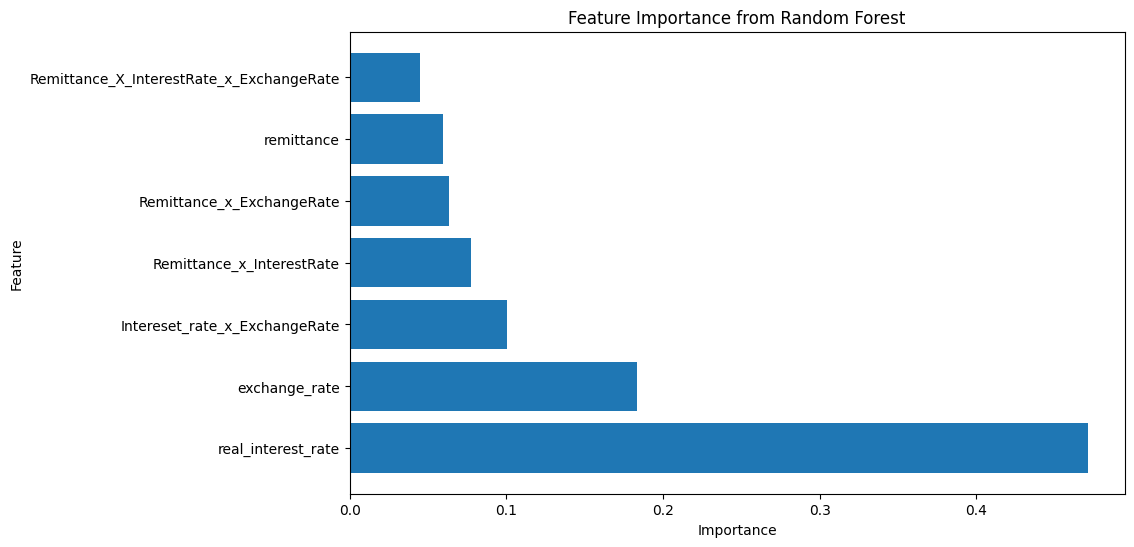

In [ ]:
# prompt: plot feature importance from rf_model with features in horizontal plane

import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf_model and X_train are defined as in your previous code
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
rf_pred_train = rf_model.predict(X_train_scaled)
print("\nRandom Forest Evaluation:")
print(f"R2 Score: {r2_score(y_train_scaled, rf_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_scaled, rf_pred_train)):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_scaled, rf_pred_train):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_scaled, rf_pred_train):.4f}")


Random Forest Evaluation:
R2 Score: 0.9455
RMSE: 0.0395
Mean Squared Error: 0.0016
Mean Absolute Error: 0.0287


Outliers:
20


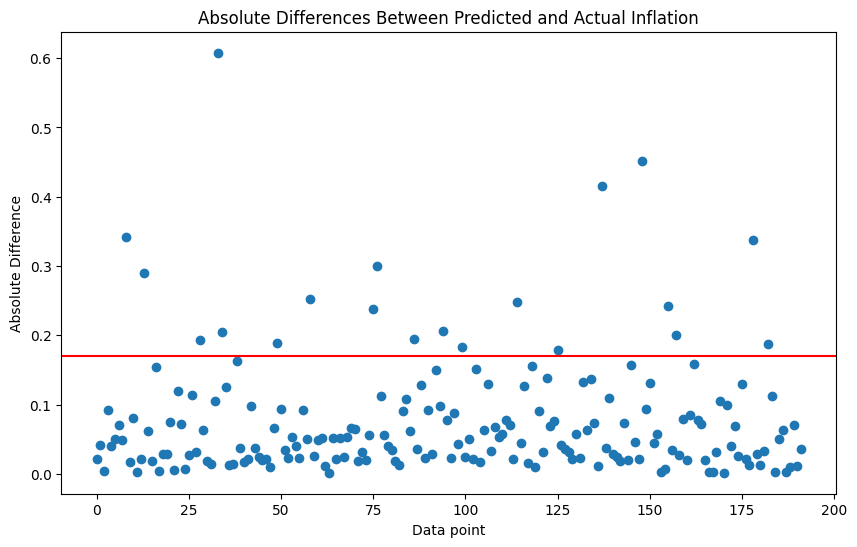

In [ ]:
# prompt: # detect outlier/anomaly by comparing rf_pred, X_test

import pandas as pd
import numpy as np

# Assuming rf_pred and X_test are already defined from your previous code

# Calculate the absolute difference between predicted and actual inflation
diff = np.abs(rf_pred.reshape(-1, 1) - y_test_scaled)

# Set a threshold for outlier detection (e.g., 2 times the standard deviation)
threshold = 2 * np.std(diff)

# Identify outliers
outliers = X_test_scaled[diff[:, 0]  > threshold]

# Display or further process the outliers
print("Outliers:")
print(len(outliers))
# You can also visualize the differences to identify potential outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(range(len(diff)),diff[:,0])
plt.axhline(y=threshold, color='r', linestyle='-')
plt.xlabel('Data point')
plt.ylabel('Absolute Difference')
plt.title('Absolute Differences Between Predicted and Actual Inflation')
plt.show()

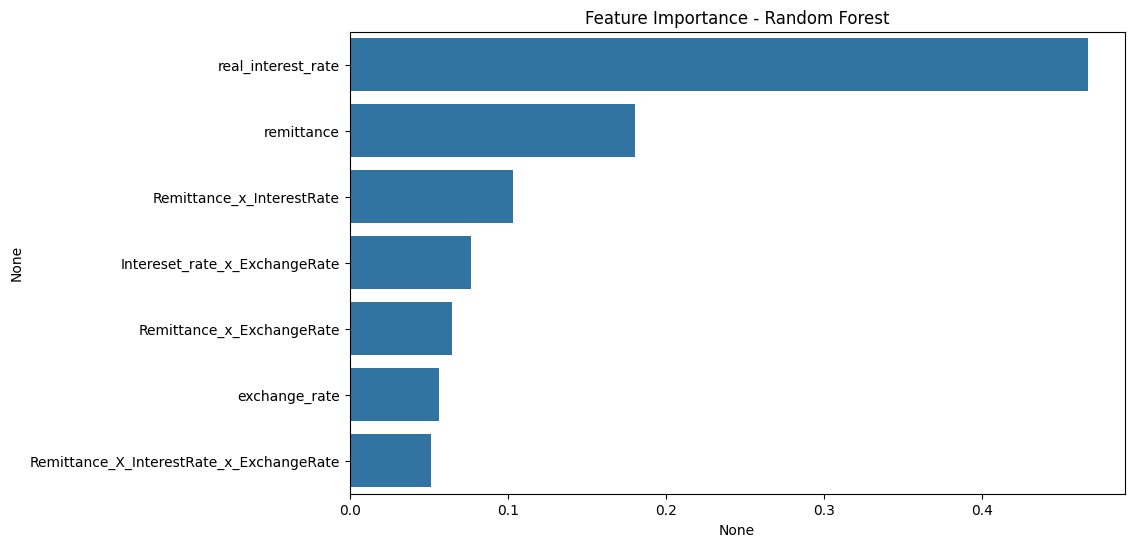

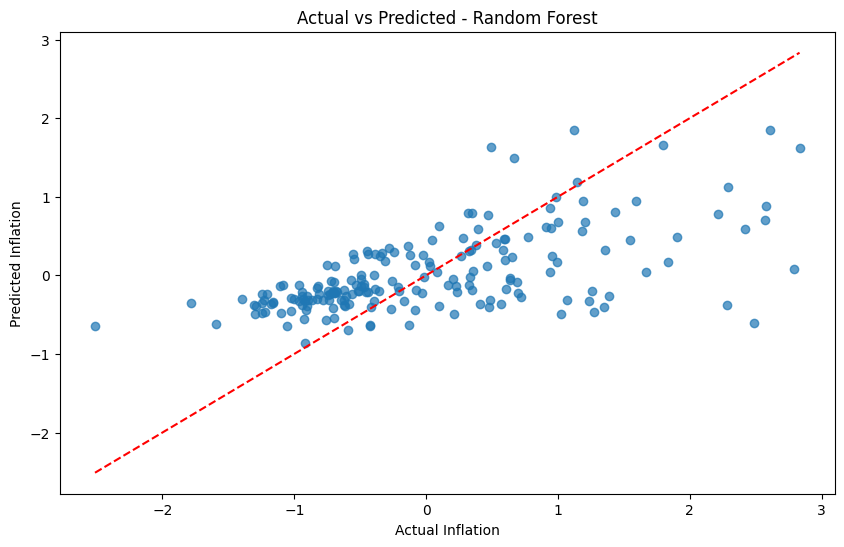

In [ ]:
# Feature importance (for ensemble techniques)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, rf_pred, alpha=0.7)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], '--', color='red')
plt.title("Actual vs Predicted - Random Forest")
plt.xlabel("Actual Inflation")
plt.ylabel("Predicted Inflation")
plt.show()


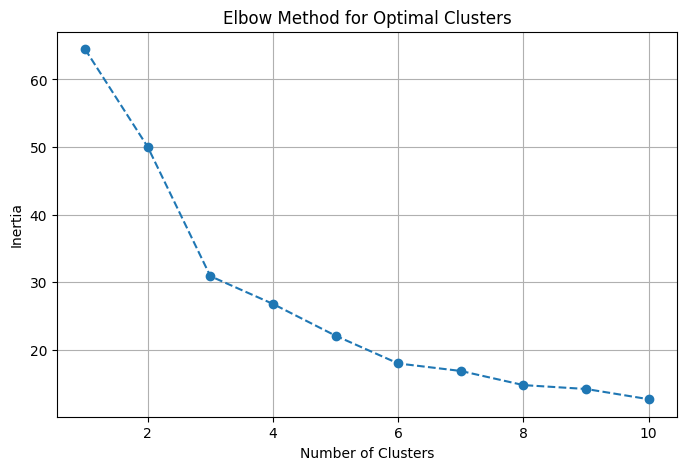

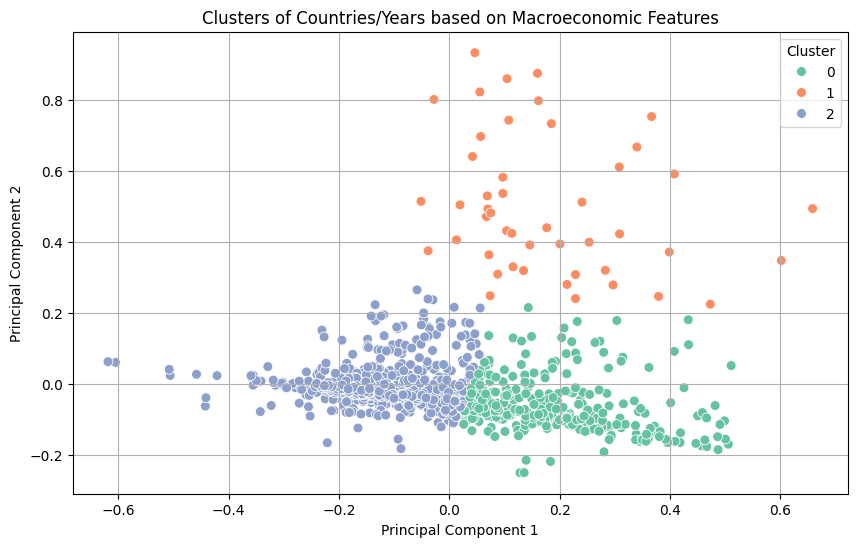

In [ ]:
from sklearn.decomposition import PCA

# Select features for clustering

data_clustering = df.copy()

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_clustering)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Test for 1 to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Based on the elbow curve, we'll select an optimal number of clusters (assume k=3 here).
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(data_normalized)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_normalized)
data_clustering['PCA1'] = data_pca[:, 0]
data_clustering['PCA2'] = data_pca[:, 1]
data_clustering['PCA3'] = data_pca[:, 2]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data_clustering, palette='Set2', s=50)
plt.title("Clusters of Countries/Years based on Macroeconomic Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score: Evaluate clustering quality
silhouette_avg = silhouette_score(data_normalized, data_clustering['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calculate mean values of features for each cluster
cluster_means = data_clustering.groupby('cluster')[df.columns].mean()
print("\nCluster Means:")
print(cluster_means)

Silhouette Score: 0.410

Cluster Means:
         exchange_rate    remittance  real_interest_rate  inflation
cluster                                                            
0           192.921525  1.847746e+09            3.772259  11.526903
1           532.572581  2.119090e+10            3.630973   7.378071
2           110.160551  1.522960e+09            9.996361   3.123110


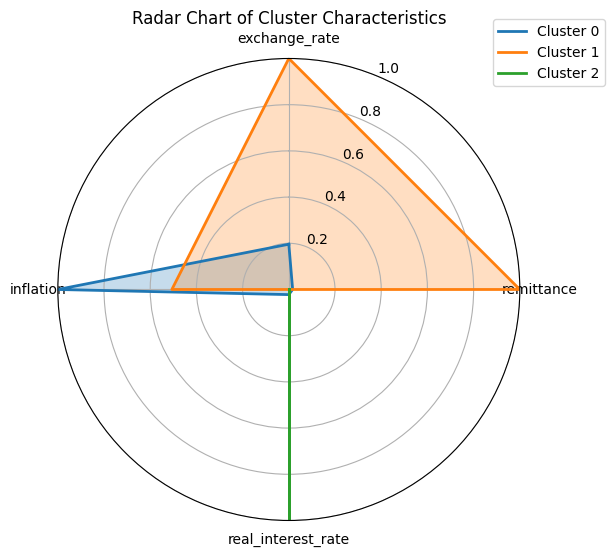

In [ ]:

normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Radar chart setup
labels = df.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i, (index, row) in enumerate(normalized_means.iterrows()):
    # Fix: Use row.values to get a NumPy array of values without index issues
    values = row.values.tolist() + [row.values[0]] # Add first value to complete the loop
    ax.plot(angles, values, label=f"Cluster {index}", linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Customize the radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
plt.title("Radar Chart of Cluster Characteristics")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 3D using PCA
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_normalized)



# Add the PCA components to the dataset
data_clustering['PCA1'] = data_pca_3d[:, 0]
data_clustering['PCA2'] = data_pca_3d[:, 1]
data_clustering['PCA3'] = data_pca_3d[:, 2]

fig = px.scatter_3d(data_clustering, x='PCA1', y='PCA2', z='PCA3', color='cluster',
                    title="Interactive 3D Clustering Visualization")
fig.update_layout(
    width=800,  # Set width in pixels
    height=600   # Set height in pixels
)


fig.show()


In [ ]:
# find number of values in each clusters
data_clustering['cluster'].value_counts()


,count
cluster,
2,587
0,324
1,47


In [ ]:
# Inflation= α + β_1 remit+ β_2 realint+ β_3 exrate+ ε_it

import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame called 'df'
# and you have already preprocessed your features (X) and target variable (y)

# Define your independent variables (features)
X = df[['remittance', 'real_interest_rate', 'exchange_rate']]

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Define your dependent variable (target)
y = df['inflation']

# Create the pooled OLS model
model = sm.OLS(y, X)  # Ordinary Least Squares

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     70.31
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           4.41e-41
Time:                        15:19:07   Log-Likelihood:                -2812.7
No. Observations:                 958   AIC:                             5633.
Df Residuals:                     954   BIC:                             5653.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.6324      0

In [ ]:
df_statistics = df.copy()

In [ ]:
df_statistics.reset_index(inplace=True)

In [ ]:
df_statistics

,country_name,year,exchange_rate,remittance,real_interest_rate,inflation
0,Eswatini,1975,0.739508,7.978280e+06,6.271984,4.213732
1,Jamaica,1976,0.909090,8.850000e+07,2.361807,11.131130
2,Eswatini,1976,0.869565,9.775000e+06,-2.703417,13.570278
3,"Egypt, Arab Rep.",1977,0.391304,9.276651e+08,-3.119680,12.337917
4,Jamaica,1977,0.909090,8.170000e+07,1.216594,12.486497
...,...,...,...,...,...,...
953,Ukraine,2023,36.573808,1.496700e+10,3.041090,18.507837
954,Uzbekistan,2023,11734.833420,1.392501e+10,8.836084,12.233077
955,St. Vincent and the Grenadines,2023,2.700000,9.177830e+07,3.008158,4.033144
956,Vanuatu,2023,119.112500,1.449673e+08,-2.132951,11.310021


In [ ]:
#  Inf= α + β_1 remit+ β_2 realint+ β_3 exrate+ α+ μ

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Assuming your data is in a pandas DataFrame called 'df'
# and you have already preprocessed your features (X) and target variable (y)

# **Check the column names in your DataFrame 'df'**
# **Print the columns to see the actual name of your country identifier column:**
print(df.columns)

# **Replace 'actual_country_column_name' with the correct column name**
model_formula = "inflation ~ remittance + real_interest_rate + exchange_rate + C(country_name)"
fixed_effects_model = smf.ols(formula=model_formula, data=df_statistics)  # Using df_statistics or df should work the same
fixed_effects_results = fixed_effects_model.fit()
print(fixed_effects_results.summary())


# Random Effects Model
exog = df[['remittance', 'real_interest_rate', 'exchange_rate']]
exog = sm.add_constant(exog)

# **Replace 'actual_country_column_name' with the correct column name**
groups = df_statistics['country_name']
random_effects_model = MixedLM(df['inflation'], exog, groups=groups)

# Fit the model and handle potential convergence issues.
try:
    random_effects_results = random_effects_model.fit()
    print(random_effects_results.summary())
except Exception as e:
    print(f"Error fitting random effects model: {e}")
    # Try different optimization methods if needed.

Index(['exchange_rate', 'remittance', 'real_interest_rate', 'inflation'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     30.99
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.65e-148
Time:                        15:23:50   Log-Likelihood:                -2477.6
No. Observations:                 958   AIC:                             5043.
Df Residuals:                     914   BIC:                             5257.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

In [ ]:
!pip install linearmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.formula.api as smf
!pip install linearmodels
# Assuming your DataFrame is named 'df' and contains the necessary columns:
# 'inflation', 'remittance', 'real_interest_rate', 'exchange_rate', 'country_name', and 'year'


# GMM-Arellano Bond estimation (dynamic panel data model)
# Requires the linearmodels library, install if you don't have it

from linearmodels.iv import IV2SLS

# Create lagged dependent variable
df_statistics['inflation_lag'] = df_statistics.groupby('country_name')['inflation'].shift(1)

# Define variables
dependent = df_statistics['inflation']
exog = sm.add_constant(df_statistics[['inflation_lag']])

# Treat these as potentially endogenous
endog = df_statistics[['remittance', 'real_interest_rate', 'exchange_rate']]

# Use lagged values of potentially endogenous variables as instruments
# *** Remove 'inflation_lag' from the instruments as it's already in exog***
instruments = df_statistics.groupby('country_name')[['remittance', 'real_interest_rate', 'exchange_rate']].shift(1)
# *** Do not add a constant here, it's already in exog ***
# instruments = sm.add_constant(instruments)
instruments = instruments.fillna(0)  # Fill NaN values introduced by lag with 0

# Check for and remove any perfectly collinear instruments before creating the model
# This is done to make sure that instruments matrix is full rank before proceeding
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

vif_data = calculate_vif(instruments)
print(vif_data)
# Identify and remove any columns having a VIF greater than 10 (or any threshold)
# This will make sure that instruments are linearly independent and matrix is full rank
instruments = instruments[[col for col in instruments.columns if vif_data[vif_data['variables']==col]['VIF'].iloc[0] < 10]]


# Instantiate and fit the model
mod = IV2SLS(dependent, exog, endog, instruments)
res = mod.fit(cov_type='unadjusted')
res

# Note: The Arellano-Bond estimator handles the dynamic panel aspect (lagged dependent variable).
# The choice of instruments is crucial for valid results.  You might need more sophisticated instrumenting if you have endogenous regressors.
# Error handling is crucial for GMM estimations, especially for convergence issues.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
            variables       VIF
0          remittance  1.110009
1  real_interest_rate  1.078325
2       exchange_rate  1.059186


/usr/local/lib/python3.10/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

/usr/local/lib/python3.10/dist-packages/linearmodels/shared/linalg.py:64: RuntimeWarning:

invalid value encountered in sqrt



IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              inflation   R-squared:                      0.1242
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1203
No. Observations:                 917   F-statistic:                    293.67
Date:                Sun, Dec 01 2024   P-value (F-stat)                0.0000
Time:                        15:26:12   Distribution:                  chi2(4)
Cov. Estimator:            unadjusted                                         
                                                                              
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.9122     0.3795     5.0384     0.0000      1.1683      2.6560
inflation_lag          0.5036     0.0307     16.408     0.0000      0.4435      0.5638
remittance          5.394e-11  3.222e-11     1.6741     0.0941  -9.211e-12   1.171e-10
real_interest_rate     0.1138     0.0353     3.2205     0.0013      0.0445      0.1830
exchange_rate          0.0002     0.0002     0.8827     0.3774     -0.0002      0.0005
======================================================================================

Endogenous: remittance, real_interest_rate, exchange_rate
Instruments: remittance, real_interest_rate, exchange_rate
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7ae8b521cd00